#American Sign Language Alphabet Gesture Recognition

Maiah Pardo<br/>
July 23, 2021

American Sign Language (ASL) is the primary language of many North Americans who are deaf and is one of several communication options used by people who are deaf or hard-of-hearing.

The hand gestures representing English alphabet are shown below. I will focus on classifying these hand gesture images using convolutional neural networks. Specifically, given an image of a hand showing one of the letters, the goal is to detect which letter is being represented.

I would like to dedicate this project to my grandparents - who have both become hard-of-hearing in their later years and have spent time recently learning American Sign Language. 

<br/>
<img src = 'https://drive.google.com/uc?id=1nRxq6yqDkmumUuePXfDx_5YgGl9vKXcj' width="300">


In [ ]:
%matplotlib inline

Downloading the training and test data.

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import io
import zipfile
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '11V_w6LMLhGcdTU-dX_mw_SZxpHmHNq-x'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('asl_alphabet_1000.zip')
!unzip -q asl_alphabet_1000.zip

Now we can see a directory containing 26 subdirectories which contains the hand gesture images. Notice that the subdirectories are named after the classes. Each of the subdirectories contains 1000 RBG images for its respective class. Each RBG image has a height and width of  200×200.

Some image printing code is adapted from: https://www.tensorflow.org/tutorials/load_data/images

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf

batch_size = 32 # The batch size
img_height = 200 # Image resize height
img_width = 200 # Image resize width
data_dir = "asl_alphabet_train_1000" # Data directory; you may need to change to location of asl_alphabet_train_1000

Using 80% of the images for training and 20% for validation.

In [ ]:
!ls asl_alphabet_train_1000

A  B  C  D  E  F  G  H	I  J  K  L  M  N  O  P	Q  R  S  T  U  V  W  X	Y  Z


In [ ]:
# Create training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 26000 files belonging to 26 classes.
Using 20800 files for training.


In [ ]:
# Create validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 26000 files belonging to 26 classes.
Using 5200 files for validation.


Printing the class names in the class_names attribute on these datasets.

In [ ]:
class_names = train_ds.class_names
print(class_names)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


Here are the first 9 images from the training dataset.

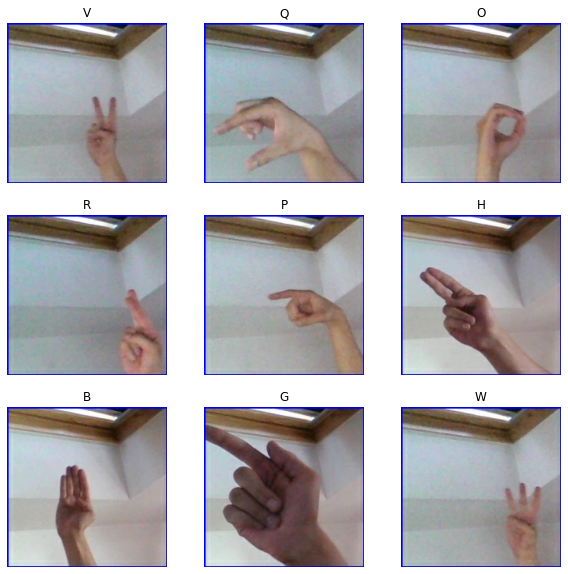

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Here are the first 9 images from the validation dataset.

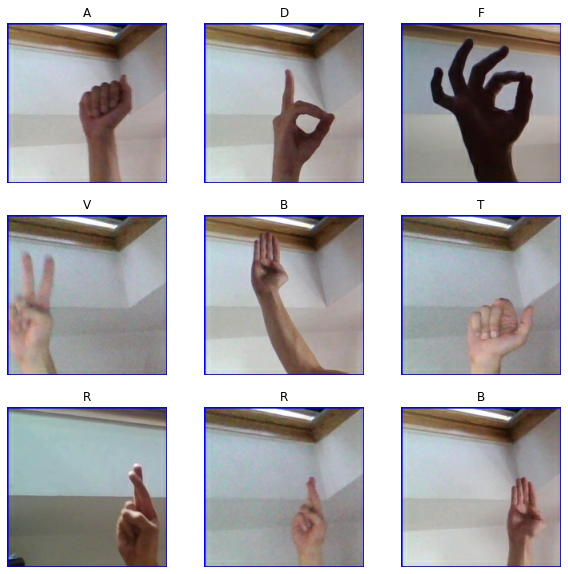

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Checking the outputs of one batch from the training datset.

Note: 
features_batch is a single single batch from the training dataset. It contains  32  height=200  by  width=200  by  channel=3  images from the training dataset. The size of the last dimension is 3, and contains the RGB values of the pixels. The labels are of size (32,).

In [ ]:
for features_batch, labels_batch in train_ds:
  print(features_batch.shape)
  print(labels_batch.shape)
  break

#print(train_ds)

(32, 200, 200, 3)
(32,)


Building a Convolutional Neural Network model that takes the ( 200×200×3  RGB) image as input, and predicts the letter.

Note: a fully connected neural network for image recognition task will not do the job. So here I build a convolutional network from scratch. I did use the TensorFlow documentation as a guide. 


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, Activation
from tensorflow.keras.activations import sigmoid
import tensorflow as tf

epochs = 10
batch_size = 32

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
650/650 [==============================] - 107s 115ms/step - loss: 1.8697 - accuracy: 0.3832 - val_loss: 1.0196 - val_accuracy: 0.5952
Epoch 2/10
650/650 [==============================] - 75s 115ms/step - loss: 0.5629 - accuracy: 0.7947 - val_loss: 0.4243 - val_accuracy: 0.8329
Epoch 3/10
650/650 [==============================] - 74s 114ms/step - loss: 0.2224 - accuracy: 0.9232 - val_loss: 0.1166 - val_accuracy: 0.9612
Epoch 4/10
650/650 [==============================] - 74s 114ms/step - loss: 0.1115 - accuracy: 0.9636 - val_loss: 0.0596 - val_accuracy: 0.9858
Epoch 5/10
650/650 [==============================] - 74s 114ms/step - loss: 0.0648 - accuracy: 0.9794 - val_loss: 0.0198 - val_accuracy: 0.9946
Epoch 6/10
650/650 [==============================] - 74s 114ms/step - loss: 0.0424 - accuracy: 0.9873 - val_loss: 0.0194 - val_accuracy: 0.9950
Epoch 7/10
650/650 [==============================] - 74s 114ms/step - loss: 0.0340 - accuracy: 0.9900 - val_loss: 0.0127 - val_a

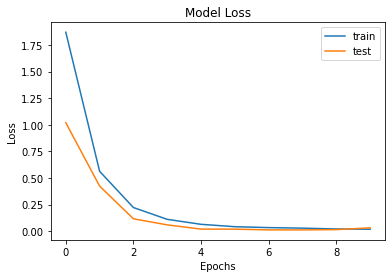

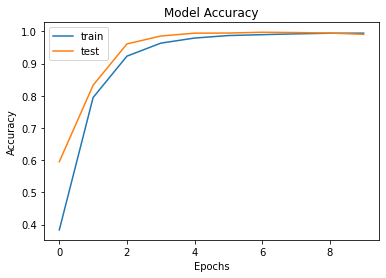

In [ ]:
''' Creating Model '''
# increased number of neurons per layer
# decreased number of layers

model = Sequential()

input_layer = Input(shape=(200, 200, 3))

# image rescaling (normalization)
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255))

# Layer 1
model.add(Conv2D(filters=16, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(200,200,3)))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2))) 

# Flatten Layer
model.add(Flatten())

# Neural network
model.add(Dense(5000, activation='relu')) # changed neurons, go up or down from here with neurons
model.add(Dense(2000, activation='relu'))
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(26))

losses = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=RMSprop(lr=0.0001), loss=losses, metrics=['accuracy'])


history = model.fit(train_ds, validation_data=val_ds, epochs = epochs, batch_size=batch_size)
model.summary()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()


The test accuracy of my model: 0.9947

For many image classification tasks, it is generally not a good idea to train a very large deep neural network model from scratch due to the enormous compute requirements and lack of sufficient amounts of training data.

One of the better options is to try using an existing model that performs a similar task to the one we need to solve. This method of utilizing a pre-trained network for other similar tasks is broadly termed Transfer Learning. Here, I use Transfer Learning to extract features from the hand gesture images and then train a smaller network to use these features as input and classify the hand gestures.

Note: convolution layers extract various features from the images which get utilized by the fully connected layers for correct classification.

<br/>
<br/>
Keras has pretrained models built in for this purpose. 

#### Keras Pretrained Models
        Xception
        VGG16
        VGG19
        ResNet, ResNetV2, ResNeXt
        InceptionV3
        InceptionResNetV2
        MobileNet
        MobileNetV2
        DenseNet
        NASNet

One can use the layers of the pretrained model up to some point, and then create some fully connected layers to learn the desired recognition task. The earlier layers are "frozen", and only the later layers need to be trained. I chose to use VGG16, which was trained to recognize 1000 objects in ImageNet. What I'm doing here for my classifier may be like finally getting the ring around a bottle at the fair, but the same process can be used to recognize objects the original network couldn't (for example, one could use this technique to train your computer to recognize family and friends).

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

Creating this pretrained network is a one line command. I specified that the "top" should not be included. We are not classifying 1000 different categories like ImageNet here, so we don't include that layer. We'll add our own layer more suited to the task at hand.

I chose 224 as the image dimension because the pretrained VGG16 was trained using the ImageNet dataset which has images of this dimension.

In [ ]:
# Import the VGG16 trained neural network model, minus it's last (top) neuron layer.
base_model = VGG16(weights = 'imagenet', 
                   include_top = False, 
                   input_shape = (200, 200, 3), 
                   pooling = None)

58900480/58889256 [==============================] - 1s 0us/step


Taking a look at the pretrained model:

In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

Note: this may be overkill for our recognition task. One could use this network with some layers (as we're about to add) to recognize 100 dog breeds or to recognize all your friends. If you wanted to recognize 100 dog breeds, you would use a final 100 neuron softmax for the final layer. We'll need a final softmax layer as before. First we freeze all these pretrained weights. They are fine as they are.

In [ ]:
# This freezes the weights of our VGG16 pretrained model.
for layer in base_model.layers:  
    print(layer)
    layer.trainable = False

Building the Classifier.<br/>
Now I chose to add a flatten layer, a trainable dense layer, and a final softmax layer to the network to complete the classifier model for the gesture recognition task. 

In [ ]:
# Add layers to our pre-trained base model and add classification layers on top of it
last_layer = base_model.output

x = Flatten()(last_layer)
x = Dense(units=500, activation='relu')(x) 
x = Dense(units=26, activation='softmax')(x)

# And now put this all together to create the new model.
model = Model(inputs=base_model.input, outputs=x) 
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 200, 200, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [ ]:
# Compile the model.

losses = tf.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer=RMSprop(lr=0.0001), loss=losses, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Training the Model.

In [ ]:
# Train the model

history = model.fit(train_ds, validation_data=val_ds, epochs = epochs)


Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/backend.py:4907: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


650/650 [==============================] - 100s 145ms/step - loss: 0.9502 - accuracy: 0.8904 - val_loss: 0.1052 - val_accuracy: 0.9810
Epoch 2/10
650/650 [==============================] - 91s 140ms/step - loss: 0.1404 - accuracy: 0.9812 - val_loss: 0.0915 - val_accuracy: 0.9873
Epoch 3/10
650/650 [==============================] - 91s 140ms/step - loss: 0.0934 - accuracy: 0.9899 - val_loss: 0.0704 - val_accuracy: 0.9915
Epoch 4/10
650/650 [==============================] - 91s 140ms/step - loss: 0.0806 - accuracy: 0.9915 - val_loss: 0.0426 - val_accuracy: 0.9965
Epoch 5/10
650/650 [==============================] - 91s 140ms/step - loss: 0.0611 - accuracy: 0.9940 - val_loss: 0.4087 - val_accuracy: 0.9715
Epoch 6/10
650/650 [==============================] - 91s 140ms/step - loss: 0.0571 - accuracy: 0.9952 - val_loss: 0.0344 - val_accuracy: 0.9962
Epoch 7/10
650/650 [==============================] - 91s 140ms/step - loss: 0.0280 - accuracy: 0.9980 - val_loss: 0.0282 - val_accuracy: 0.

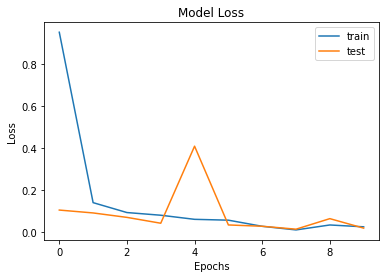

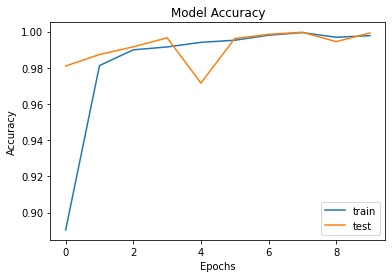

In [ ]:
# Plot the training curve

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

The best test accuracy the model was able to achieve is 0.9977.